# SPLEX-Project 2020-2021 : Frog Calls 
-------
## 🐸 Step 2 : Predictory and classifications analysis of dataset 🐸
#### *Adrien Leroy and Antoine Auvergne*

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.svm import SVC

#### Key variables

In [2]:
dataset=pd.read_csv('../Anuran_Calls/Frogs_MFCCs.csv')
features=dataset.columns[1:-4]
labels=dataset.columns[-4:]
family,genus,species,id=labels

### A. Random Forest 🌳🌳🌳

#### Testing classification with all labels __Independently__

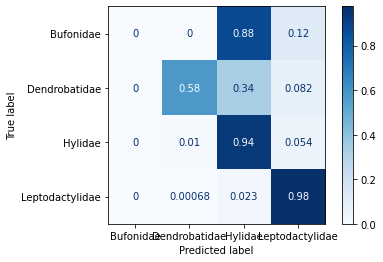

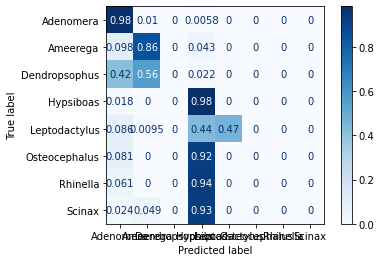

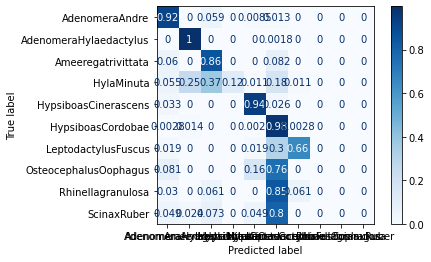

In [3]:
for label in labels[:-1]:
    x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                        dataset[label], 
                                                        test_size=0.33, 
                                                        random_state=42)



    Rfclf = RandomForestClassifier(max_depth=3, random_state=0)
    Rfclf.fit(x_train, y_train)

    y_predicted=Rfclf.predict(x_test)
    confusion_matrix(y_test,y_predicted)
    plot_confusion_matrix(Rfclf,x_test,y_test,cmap=plt.cm.Blues,
                                     normalize='true')

    plt.savefig("../images/confusionMatrixGeneral_"+str(label)+".png")


#### Creating the pipeline to cluster them hierarchically

In [4]:
x_train, x_test, y_train, y_test = train_test_split(dataset[features].values, 
                                                    dataset[labels], 
                                                    test_size=0.33, 
                                                    random_state=42)


print("Classifying Families",'\n')
RfclfGeneral=RandomForestClassifier(max_depth=3, random_state=1)
RfclfGeneral.fit(x_train,y_train[family])


RfclfFamiliesRF=[]
RfclFamiliesLabels=[]

RfclfGenusRF=[]
RfclfGenusLabels=[]

print("Classifying Genus : ",'\n')

for label in np.unique(dataset[family]):
    print("Classifying "+str(label))
    
    #print(y_predicted.shape)
    #print(list(y_train[y_train[family]==label][genus]))
    #print(y_train[y_train[family]==label][genus])
    #print(np.unique(y_train[y_train[family]==label][genus]))
    
    RfclfTemp = RandomForestClassifier(max_depth=3, random_state=1)
    #print(list(y_train[y_train[family]==label][genus]))
    RfclfTemp.fit(x_train[y_train[family]==label],(y_train[y_train[family]==label][genus]))
    
    RfclFamiliesLabels.append(label)
    RfclfFamiliesRF.append(RfclfTemp)
    
RfclfFamilies=dict(zip(RfclFamiliesLabels,RfclfFamiliesRF))

print("\nClassifying Species : ",'\n')

for label in np.unique(dataset[genus]):
    print("Classifying "+str(label))
    
    #print(y_predicted.shape)
    #print(list(y_train[y_train[family]==label][genus]))
    #print(y_train[y_train[family]==label][genus])
    #print(np.unique(y_train[y_train[genus]==label][species]))
    
    RfclfTemp = RandomForestClassifier(max_depth=3, random_state=1)
    #print(list(y_train[y_train[family]==label][genus]))
    RfclfTemp.fit(x_train[y_train[genus]==label],(y_train[y_train[genus]==label][species]))
    
    RfclfGenusLabels.append(label)
    RfclfGenusRF.append(RfclfTemp)
    
RfclfGenus=dict(zip(RfclfGenusLabels,RfclfGenusRF))


Classifying Families 

Classifying Genus :  

Classifying Bufonidae
Classifying Dendrobatidae
Classifying Hylidae
Classifying Leptodactylidae

Classifying Species :  

Classifying Adenomera
Classifying Ameerega
Classifying Dendropsophus
Classifying Hypsiboas
Classifying Leptodactylus
Classifying Osteocephalus
Classifying Rhinella
Classifying Scinax


#### Predicting Results 🐸

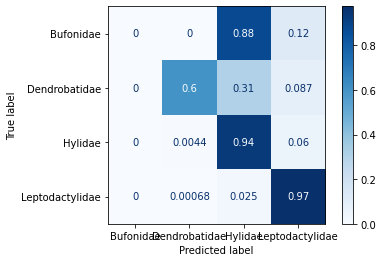

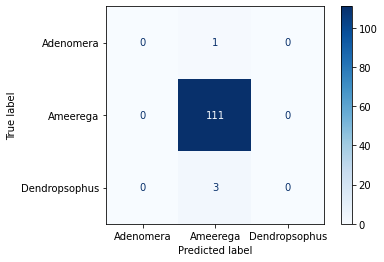

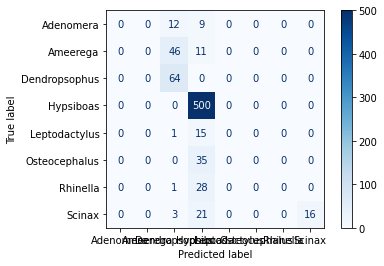

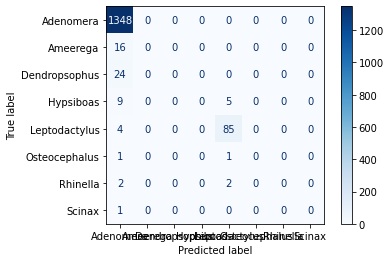

In [5]:
plot_confusion_matrix(RfclfGeneral,
                      x_test,
                      y_test[family],
                      cmap=plt.cm.Blues,
                      normalize='true')


y_predictedFamily=RfclfGeneral.predict(x_test)


for label in np.unique(y_predictedFamily):
    x_testTemp=x_test[y_predictedFamily==label]
    y_predictedGenusTemp=RfclfFamilies[label].predict(x_testTemp)
    
    plot_confusion_matrix(RfclfFamilies[label],
                      x_testTemp,
                      y_test[y_predictedFamily==label][genus],
                      cmap=plt.cm.Blues)

        


### B. SVM Classifier

#### Testing classification with all labels __Independently__

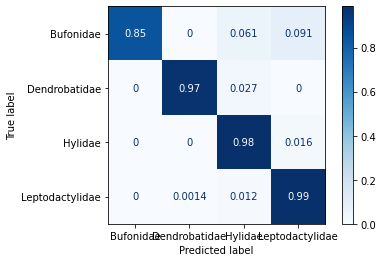

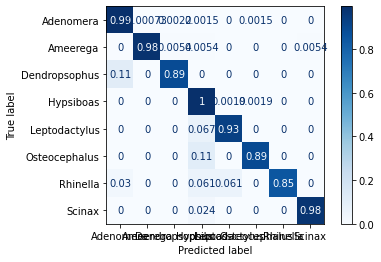

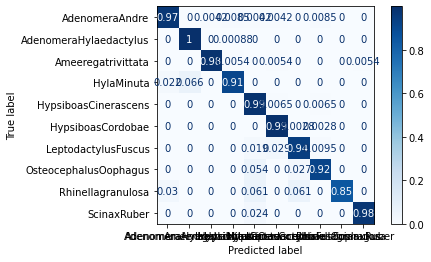

In [13]:
svc_clf=SVC()
svc_clf.fit(x_train,y_train[family])
plot_confusion_matrix(svc_clf,x_test,y_test[family],cmap=plt.cm.Blues,normalize='true')
svc_clf.fit(x_train,y_train[genus])
plot_confusion_matrix(svc_clf,x_test,y_test[genus],cmap=plt.cm.Blues,normalize='true')
svc_clf.fit(x_train,y_train[species])
plot_confusion_matrix(svc_clf,x_test,y_test[species],cmap=plt.cm.Blues,normalize='true')

 #### Creating the pipeline to cluster them hierarchically

In [7]:
print("Classifying Families",'\n')
SVMclfGeneral=SVC()
SVMclfGeneral.fit(x_train,y_train[family])


SVMclfFamiliesSVM=[]
SVMclFamiliesLabels=[]

SVMclfGenusSVM=[]
SVMclfGenusLabels=[]

print("Classifying Genus : ",'\n')

for label in np.unique(dataset[family]):
    print("Classifying "+str(label))
    
    if len(np.unique(y_train[y_train[family]==label][genus]))>1:
        SVMclfTemp = SVC()
        SVMclfTemp.fit(x_train[y_train[family]==label],(y_train[y_train[family]==label][genus]))

        SVMclFamiliesLabels.append(label)
        SVMclfFamiliesSVM.append(SVMclfTemp)
    else:
        genusTemp=np.unique(y_train[y_train[family]==label][genus])[0]
        print(genusTemp)
        SVMclFamiliesLabels.append(label)
        SVMclfFamiliesSVM.append(genusTemp)
    
SVMclfFamilies=dict(zip(SVMclFamiliesLabels,SVMclfFamiliesSVM))
print(SVMclfFamilies)

print("\nClassifying Species : ",'\n')

for label in np.unique(dataset[genus]):
    print("Classifying "+str(label))

    if len(np.unique(y_train[y_train[genus]==label][species]))>1:

        SVMclfTemp = SVC()
        SVMclfTemp.fit(x_train[y_train[genus]==label],(y_train[y_train[genus]==label][species]))
        SVMclfGenusLabels.append(label)
        SVMclfGenusSVM.append(SVMclfTemp)
    else:
        
        specieTemp=np.unique(y_train[y_train[genus]==label][species])[0]
        
        SVMclfGenusLabels.append(label)
        SVMclfGenusSVM.append(specieTemp)

        
SVMclfGenus=dict(zip(SVMclfGenusLabels,SVMclfGenusSVM))

Classifying Families 

Classifying Genus :  

Classifying Bufonidae
Rhinella
Classifying Dendrobatidae
Ameerega
Classifying Hylidae
Classifying Leptodactylidae
{'Bufonidae': 'Rhinella', 'Dendrobatidae': 'Ameerega', 'Hylidae': SVC(), 'Leptodactylidae': SVC()}

Classifying Species :  

Classifying Adenomera
Classifying Ameerega
Classifying Dendropsophus
Classifying Hypsiboas
Classifying Leptodactylus
Classifying Osteocephalus
Classifying Rhinella
Classifying Scinax


#### Predicting results

In [8]:
y_predicted=pd.DataFrame(columns=y_test.columns[:-1])
display(y_predicted)

,Family,Genus,Species


,Family,Genus,Species
0,Leptodactylidae,NaN,NaN
1,Hylidae,NaN,NaN
2,Hylidae,NaN,NaN
3,Leptodactylidae,NaN,NaN
4,Leptodactylidae,NaN,NaN
...,...,...,...
2370,Leptodactylidae,NaN,NaN
2371,Leptodactylidae,NaN,NaN
2372,Leptodactylidae,NaN,NaN
2373,Hylidae,NaN,NaN


ici
['AdenomeraHylaedactylus' 'AdenomeraHylaedactylus'
 'AdenomeraHylaedactylus' ... 'AdenomeraAndre' 'AdenomeraHylaedactylus'
 'AdenomeraHylaedactylus']
ici
['HypsiboasCinerascens' 'HypsiboasCordobae' 'HypsiboasCinerascens'
 'HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCordobae'
 'HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCordobae'
 'HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCordobae'
 'HypsiboasCinerascens' 'HypsiboasCordobae' 'HypsiboasCinerascens'
 'HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCordobae'
 'HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCinerascens'
 'HypsiboasCinerascens' 'HypsiboasCordobae' 'HypsiboasCordobae'
 'HypsiboasCinerascens' 'HypsiboasCinerascens' 'HypsiboasCinerascens'
 'HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCinerascens'
 'HypsiboasCordobae' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'HypsiboasCordobae' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'HypsiboasCordobae' 'HypsiboasCordobae' 'HypsiboasCordobae'
 'HypsiboasCo

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2370,Leptodactylidae,Adenomera,AdenomeraAndre
2371,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2372,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2373,Hylidae,Hypsiboas,HypsiboasCordobae


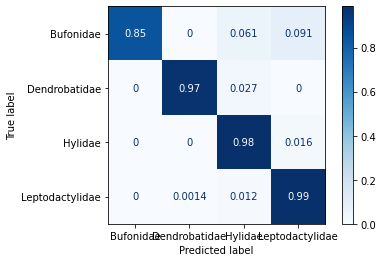

In [9]:
plot_confusion_matrix(SVMclfGeneral,
                      x_test,
                      y_test[family],
                      cmap=plt.cm.Blues,
                      normalize='true')


y_predicted[family]=SVMclfGeneral.predict(x_test)
display(y_predicted)

for label in np.unique(y_predicted[family]):
    
    x_testTemp=x_test[y_predicted[family]==label]
    x_testTempIndices=np.where(y_predicted[family]==label)[0]
    
    
    if type(SVMclfFamilies[label])!=str:
        
        y_predictedGenusTemp=SVMclfFamilies[label].predict(x_testTemp)
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
    else:

        y_predictedGenusTemp=[SVMclfFamilies[label] for i in x_testTempIndices]
        y_predicted[genus].iloc[x_testTempIndices]=y_predictedGenusTemp
        
for sublabel in np.unique(y_predicted[genus]):

    x_testTemp=x_test[y_predicted[genus]==sublabel]
    x_testTempIndices=np.where(y_predicted[genus]==sublabel)[0]

    if type(SVMclfGenus[sublabel])!=str:

        print('ici')

        y_predictedSpecieTemp=SVMclfGenus[sublabel].predict(x_testTemp)

        print(y_predictedSpecieTemp)
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp

    else:

        y_predictedSpecieTemp=[SVMclfGenus[sublabel] for i in x_testTempIndices]
        y_predicted[species].iloc[x_testTempIndices]=y_predictedSpecieTemp
        

display(y_predicted)

In [14]:
cm=confusion_matrix(y_test[family],y_predicted[family])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test[family]))
disp = disp.plot(cmap=plt.cm.Blues)

cm=confusion_matrix(y_test[genus],y_predicted[genus])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test[genus]))
disp = disp.plot(cmap=plt.cm.Blues)

cm=confusion_matrix(y_test[species],y_predicted[species],normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_test[species]))
disp = disp.plot(cmap=plt.cm.Blues)

TypeError: __init__() got an unexpected keyword argument 'normalize'